# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [10]:
import numpy as np
from numpy.random import random, normal, seed
import matplotlib.pyplot as plt

**DO NOT** ```import *```. As your programs get more complex you will generally need to import a greater range of modules, and it's important to keep them separate.

# Introduction
Most physicists are unlikely to go gambling at Monte Carlo - even if they were paid enough. Our knowledge of statistics is sufficient warning. But that doesn’t stop physicists using the _Monte Carlo method_ extensively for maths and physics problems.

As the name suggests, the Monte Carlo (MC) method is based on using randomness. At first sight, this seems counter intuitive - surely random numbers can only lead to more randomness? As a very simple illustration of how to use random numbers in a calculation, consider the following problem.

Suppose you have a circular pond of of unit radius, placed exactly in a square area of grass.

Imagine throwing $N$ stones randomly into the square area. What number $n$ would land in the pond? Clearly we know the theoretical answer in this case - it just depends on the ratio area of the pond and square, so $n = N\pi/4$. But suppose you didn’t already know a value for $\pi$. Then by finding the ratio $4n/N$ you will have an approximation to $\pi$ which depends only on using random numbers (and, as we’ll see shortly, Pythagoras’ theorem).

To implement this idea in python you can make use of the following code snippet:

In [6]:
N=int(1e7)
n=0
#for i in range (N):
#    x = 2*random()-1
#    y = 2*random()-1
#    r = np.sqrt(x*x+y*y)
#    if r <= 1.0:
#        n+=1 # adds 1 to n
print(4*n/N)

0.0


The function random returns a random real number uniformly distributed in the range $[0,1)$, so $x$ and $y$ lie in the range $[-1,1)$ here. Investigate what value of $\pi$ you get, and how it depends on the number $N$ that you pick. (You could repeat for different values of $N$ and plot a graph of $\pi$ versus $N$.) Note that you don’t really need to take the square root in this case as we are dealing with a unit circle. (We could equally just take a circular quadrant instead of a whole circle if we use random number in the interval 0 to 1)

The example above can take some time to run. But the code below, which does the same operations, is much faster:

In [7]:
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

3.1415872


For the most part the increased speed is due to using _vector instructions_ built-in the `numpy` library. Those cannot be used by a `for` loop.

## Measuring execution speed

To measure the speed of a piece of code, if you are uring IPython/Jupyter (as Colab does), the IPython [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) command `%%time` is very useful:

In [8]:
%%time

x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

3.141866
CPU times: user 294 ms, sys: 91.8 ms, total: 386 ms
Wall time: 390 ms


Note that the similar-sounding `%%timeit` command will run the cell several time and calculate the average. In the absence of IPython, you can also use the `datetime` module:

In [9]:
from datetime import datetime
startTime = datetime.now()
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)
print(datetime.now() - startTime)

3.1425032
0:00:00.396837


## How random?
It is interesting to plot out some generated random numbers to get a feel for how random they look. You already saw in week 3 of the PX1224 module how to plot out histograms. So we can do something like this...

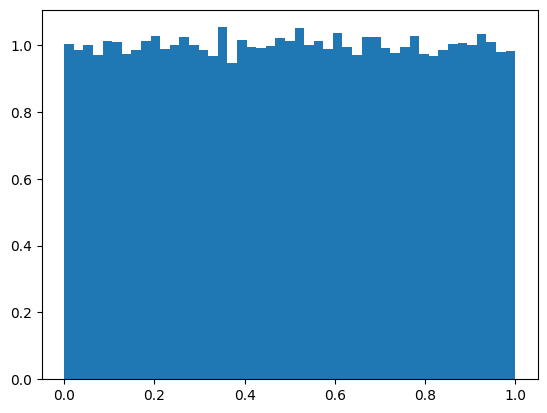

In [10]:
# make the uniform random data ...
N = int(1e5)
x = np.zeros(N)
for i in range(N): # very slow to loop like this
    x[i] = random()
# the histogram of the data
plt.hist(x, bins='auto',density=True);

And a neater way to create an array of N random numbers is like this ...

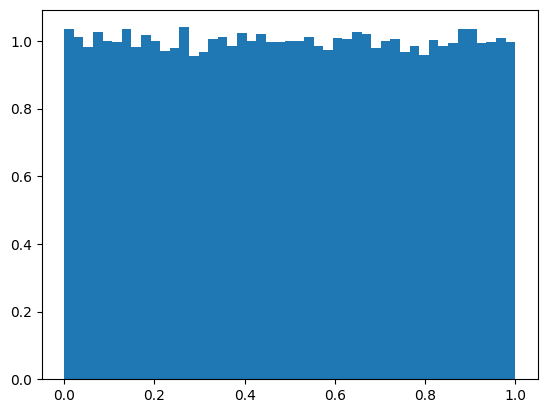

In [11]:
# make the uniform random data ...
N = int(1e5)
x = random(N)
plt.hist(x, bins='auto',density=True);

You’ll see that, to the eye, the data look very uniformly distributed. How are random numbers generated in the computer? In fact, they are not entirely random, but are generated by an algorithm that produces a sequence of numbers that is _pseudo-random_. A great deal of research goes into generating pseudo-random numbers that pass known tests for randomness (rather more sophisticated than just looking at histograms). Take a look at http://www.random.org/ if you want truly random numbers.
One advantage of pseudo-random number generation is that you can always generate the same sequence of numbers again for testing purposes! This is done by using a starting seed. To do this the syntax is:
```python
seed(1234)
```
where you can use any convenient integer starting seed.

## Other probability distributions

The [numpy and scipy documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions) website gives a good description of other random number distributions, not just the uniform one we’ve looked at so far. For example `y = normal(loc=0.0, scale=1.0, size=N)` will return an array of $N$ numbers with a Gaussian or normal probability distribution, with mean $\mu = 0$ and standard deviation $\sigma = 1$.

# Applications

## Integration in 1-D

One application of the MC method is to the evaluation of integrals. Suppose we select $N$ random numbers $x_0,x_1,x_2,...,x_{N-1}$ in the interval $[0,1)$, then
$$
\int_0^1 f(x)\,dx\approx\frac{1}{N}\sum_{i=0}^{N-1}f(x_i)
$$
This is not the best method in 1-D, since the error in the approximation is of order $1/\sqrt{N}$, and many more points are required for a good estimate of the integral than, for example, the Romberg method. But it turns out to be increasingly beneficial in higher dimensions.

Let’s look at a trivial example. We want to integrate $f(x) = x^2$ between 0 and 1. The relevant code snippet is something like this:

In [12]:
def f(x):
    return x**2

N = int(1e3)
s = 0 # s is the sum
for i in range (N):
    x = random() # get a random number in [0,1) ...
    s += f(x)
integral = s/N
print('Approximate result for {} points: {}'.format(N,integral))

Approximate result for 1000 points: 0.3251627301651106


It’s fairly clear why this works, since $s/N$ will be the average value of the function. Multiplying by the interval length, $1$ in this example, thus approximates the integral. If we want the integral between limits (a,b), we would have to multiply the average of the function over this interval by (b-a).
$$
\int_a^b f(x)\,dx\approx(b-a)\frac{1}{N}\sum_{i=0}^{N-1}f(x_i)
$$
Note: **You need to improve the code** by avoiding the loop (i.e. using the vectorised form of
defining random numbers).

## Integration in 2-D

**Simplest case**: It’s easy to extend this idea to 2-D (and higher dimensions). If we have
a 2-D rectangular region $a \leq x \leq b$, $c \leq y \leq d$ then
$$
\int_a^b\int_c^d f(x,y)\,dxdy\approx\frac{(b-a)(c-d)}{N}\sum_{i=0}^{N-1}f(x_i,y_i)
$$
If the region - call it $\Omega$ - is not rectangular, we simply find the average over the region, then multiply by the area $A_\Omega$ of the region.

**General case**: Sometimes it’s hard to know the area of the region (because it is not a
simple shape or is defined by equations) but we can easily extend this idea as follows:

Simply define a rectangular region R (of _known_ area $A_R$) which contains $\Omega$ (This is what we did in the introduction):

![regions](https://raw.githubusercontent.com/PX2134/images/master/week6/regions.png)

Select $N$ points randomly in $R$. If $n$ of these points turn out to be within $\Omega$, then the area of region $\Omega$ is approximately $(n/N)A_R$. Our integral is thus
$$
\int\int_\Omega f(x,y)\,dxdy\approx\left(\frac{n}{N}A_R\right)\frac{1}{n}\sum_{i\in\Omega}f(x_i,y_i)
$$
where the notation $i\in\Omega$ means points $i$ which are within the region $\Omega$. If we integrate the function $f(x, y) = 1$ then this would let us calculate the unknown area of the region $\Omega$. If $f(x, y)$ were the _density_ of the region, then the integral would give us its _mass_.

Another way of deriving the equation above is to cancel out the $n$ and note that $A_R/N$ is just the average area that each point occupies in the plane. The double integral is thus (approximately) the average area per point multiplied by the sum of $f$ values within $\Omega$.

## Integration in 3-D
You can guess the rest! Again note here that if we integrate the function $f(x, y, z) = 1$ then it would give us the volume of a region. If $f(x, y, z)$ were the _density_ of the region, then the integral would give us its _mass_. Can you see how _moment of inertia_ could be calculated?

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See LearningCentral for a video of integrating a function using the Monte Carlo method.

## Exercise 1

[4] Plot histograms using the uniform and normal distribution random number generators. Investigate how the histograms depend on the number of points
taken.

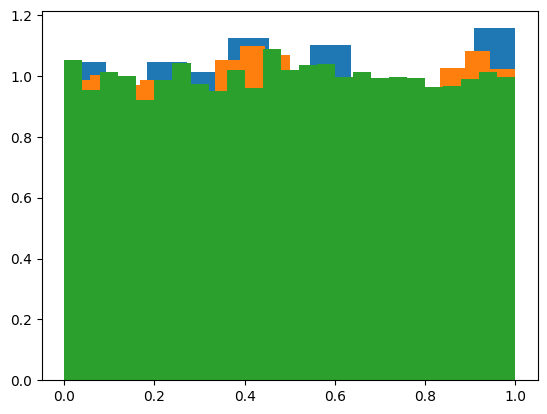

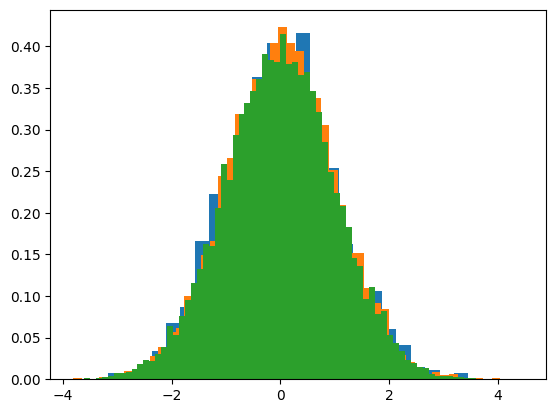

In [8]:
N1 = 1000
N2 = 5000
N3 = 15000

plt.figure()
x = random(N1)
plt.hist(x, bins='auto',density=True);
x = random(N2)
plt.hist(x, bins='auto',density=True);
x = random(N3)
plt.hist(x, bins='auto',density=True);

plt.figure()
y = normal(loc=0.0, scale=1.0, size=N1)
plt.hist(y, bins='auto',density=True);
y = normal(loc=0.0, scale=1.0, size=N2)
plt.hist(y, bins='auto',density=True);
y = normal(loc=0.0, scale=1.0, size=N3)
plt.hist(y, bins='auto',density=True);

The number of data points taken vary the bin size of the histograms

## Exercise 2

[7] Find $\pi$ using the method described in the introduction and plot a unit square to illustrate points which lie within the unit circle. It’s much faster to use the second method of making the random numbers, `x=random(N)`. You should plot data points within the circle in blue and those outside in green. Adapt code similar to that below to do the plotting.
```python
inpond = np.sqrt(x**2+y**2) <= 1.0 # True if in the pond
plt.plot(x[inpond==True], y[inpond==True],'b.')
```
 Compare the speed between using a `for` loop and using the vectorised `x=random(N)`.

3.1418532
CPU times: user 1.33 s, sys: 594 ms, total: 1.92 s
Wall time: 1.93 s


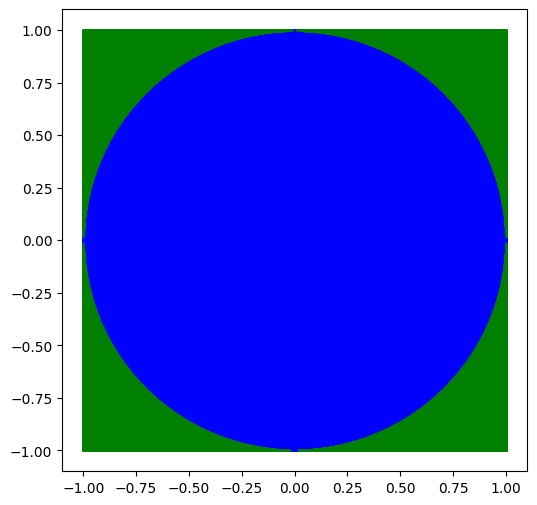

In [37]:
%%time
N=int(1e7)
n=0
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)
inpond = np.sqrt(x**2+y**2) <= 1.0 # True if in the pond
plt.figure(figsize=(6,6))
plt.title("")
plt.plot(x[inpond==True], y[inpond==True],'b.',markersize=1)
plt.plot(x[inpond==False], y[inpond==False],'g.',markersize=1)

In [24]:
%%time
N=int(1e7)
n=0
for i in range (N):
    x = 2*random()-1
    y = 2*random()-1
    r = np.sqrt(x*x+y*y)
    if r <= 1.0:
        n+=1 # adds 1 to n
print(4*n/N)

3.1413708
CPU times: user 17.6 s, sys: 8.7 ms, total: 17.7 s
Wall time: 18.1 s


For the vectorized x=random:
```
CPU times: user 1.33 s, sys: 594 ms, total: 1.92 s
Wall time: 1.93 s
```    

For the vectorized x=random:
```
CPU times: user 17.6 s, sys: 8.7 ms, total: 17.7 s
Wall time: 18.1 s
```

## Exercise 3

[9] Integrate $f(x) = sin(x)tan(x)$ between $0$ and $\pi/4$ using the MC method, and compare with the exact answer (obtained for instance via [WolframAlpha](https://www.wolframalpha.com/)). Investigate what happens with increasing the number of points $N$ you use by plotting the MC answer versus number of points, choosing appropriate values for $N$ and choice of axes.

 To get full marks you must avoid using a loop in the integration (but you can loop over different values of $N$).

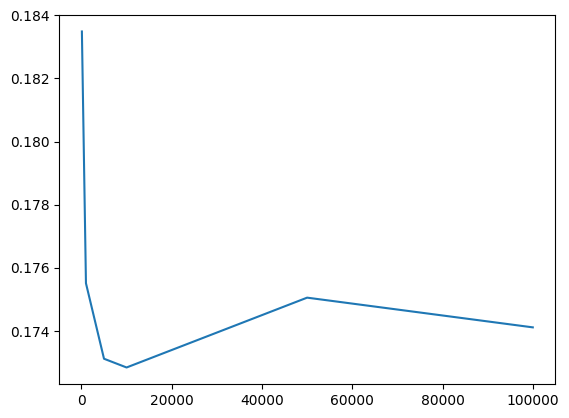

In [43]:
def f(x):
    return np.sin(x)*np.tan(x)

N = int(1e7)

n=0
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
pie=4*n/N

Ns = [100, 1000, 5000, 10000, 50000, 100000]
mc_results = []

for N in Ns:
    x = np.random.uniform(0, pie/4, N)
    mc_integral = (np.pi/4) * np.mean(f(x))
    mc_results.append(mc_integral)

plt.plot(Ns, mc_results)
plt.tile='Monte Carlo Estimate'